# 参考代码

In [1]:
# import libaries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines

def main():
	# download airport info data
	airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
	               'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
	airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
	                        names = airport_col, index_col = 0)

	# download flight routes data
	route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
	              'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
	routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
	                        names = route_cols)
	#clean up data, change 'object' type to numeric and drops NaNs
	routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), 'coerce')
	routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), 'coerce')
	routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"]) 
	#simple_visualization(airport_df, airport_df)
	#advanced_visualization(airport_df, routes_df)



##### Part 2: more on visualization, only mainlain territories with more features ####
######################################################################################
# extract country and then extra columns
def advanced_visualization (airport_df, routes_df):
	if (airport_df is None) or (routes_df is None):
		print ("Data cannot be retrieved and read")
	else:
		airport_us = airport_df[(airport_df.Country == "United States") & (airport_df.Lat > 25) 
								& (airport_df.Lat < 50) & (airport_df.Long > -130) & (airport_df.Long < -60)]
		us_airport_ix = airport_us.index.values
		routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
		                     (routes_df['Dest Airport ID'].isin(us_airport_ix))] #extract routes that flyies from AND to USA
		routes_us =  pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))
		# to find number of flights in and out of an airport
		# it is similar to find number of rows in which each airport occur in either one of the 2 columns
		counts = routes_us['Source Airport'].append(routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
		# create a data frame of position based on names in count
		counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
		pos_data = counts.merge(airport_us, on = 'IATA')

		# Create graph
		graph = nx.from_pandas_edgelist(routes_us, source = 'Source Airport', target = 'Dest Airport',
		                        edge_attr = 'counts',create_using = nx.DiGraph())

		# Set up base map
		plt.figure(figsize=(15,20))
		m = Basemap(
		        projection='merc',
		        llcrnrlon=-180,
		        llcrnrlat=10,
		        urcrnrlon=-50,
		        urcrnrlat=70,
		        lat_ts=0,
		        resolution='l',
		        suppress_ticks=True)

		# import long lat as m attribute
		mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
		pos = {}
		for count, elem in enumerate (pos_data['IATA']):
		    pos[elem] = (mx[count], my[count])

		# draw nodes and edges and overly on basemap
		nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 100],
		                       node_color = 'r', alpha = 0.8,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 100])

		nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
		                        labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 100})

		nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 100],
		                       node_color = 'b', alpha = 0.6,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 100])

		nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', width = routes_us['counts']*0.75, 
		                       alpha=0.06, arrows = False)

		m.drawcountries(linewidth = 3)
		m.drawstates(linewidth = 0.2)
		m.drawcoastlines(linewidth=1)
		m.fillcontinents(alpha = 0.3)
		line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
		line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
		line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
		plt.legend((line1, line2, line3), ('Large Airport > 100 routes', 'Smaller airports', 'routes'),
		           loc=4, fontsize = 'xx-large')
		plt.title("Network graph of flight routes in the USA", fontsize = 30)
		#m.bluemarble()
		plt.tight_layout()
		#plt.savefig("./images/networkx_basemap/map_3.png", format = "png", dpi = 300)
		plt.show()
		print ("successful visualization")
		return 0

if __name__ == "__main__":
    main()  

In [2]:
# download airport info data
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
                'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                        names = airport_col, index_col = 0)
# download flight routes data
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
                'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
                        names = route_cols)

In [3]:
#clean up data, change 'object' type to numeric and drops NaNs
routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), 'coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), 'coerce')
routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"]) 

In [4]:
airport_yga = airport_df[(airport_df.Lat > 10) & (airport_df.Lat < 23.4) & (airport_df.Long > 100.4) & (airport_df.Long < 114.6) & (airport_df["City"] != "Sek Kong") & (airport_df["City"] != "Haikou")]

In [5]:
yga_airport_ix = airport_yga.index.values
routes_yga = routes_df[(routes_df['Source Airport ID'].isin(yga_airport_ix)) &
                        (routes_df['Dest Airport ID'].isin(yga_airport_ix))] 
routes_yga =  pd.DataFrame(routes_yga.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))

In [6]:
counts = routes_yga['Source Airport'].append(routes_yga.loc[routes_yga['Source Airport'] != routes_yga['Dest Airport'], 'Dest Airport']).value_counts()
counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
pos_data = counts.merge(airport_yga, on = 'IATA')

In [7]:
graph = nx.from_pandas_edgelist(routes_yga, source = 'Source Airport', target = 'Dest Airport',
                        edge_attr = 'counts',create_using = nx.DiGraph())


In [8]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [9]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

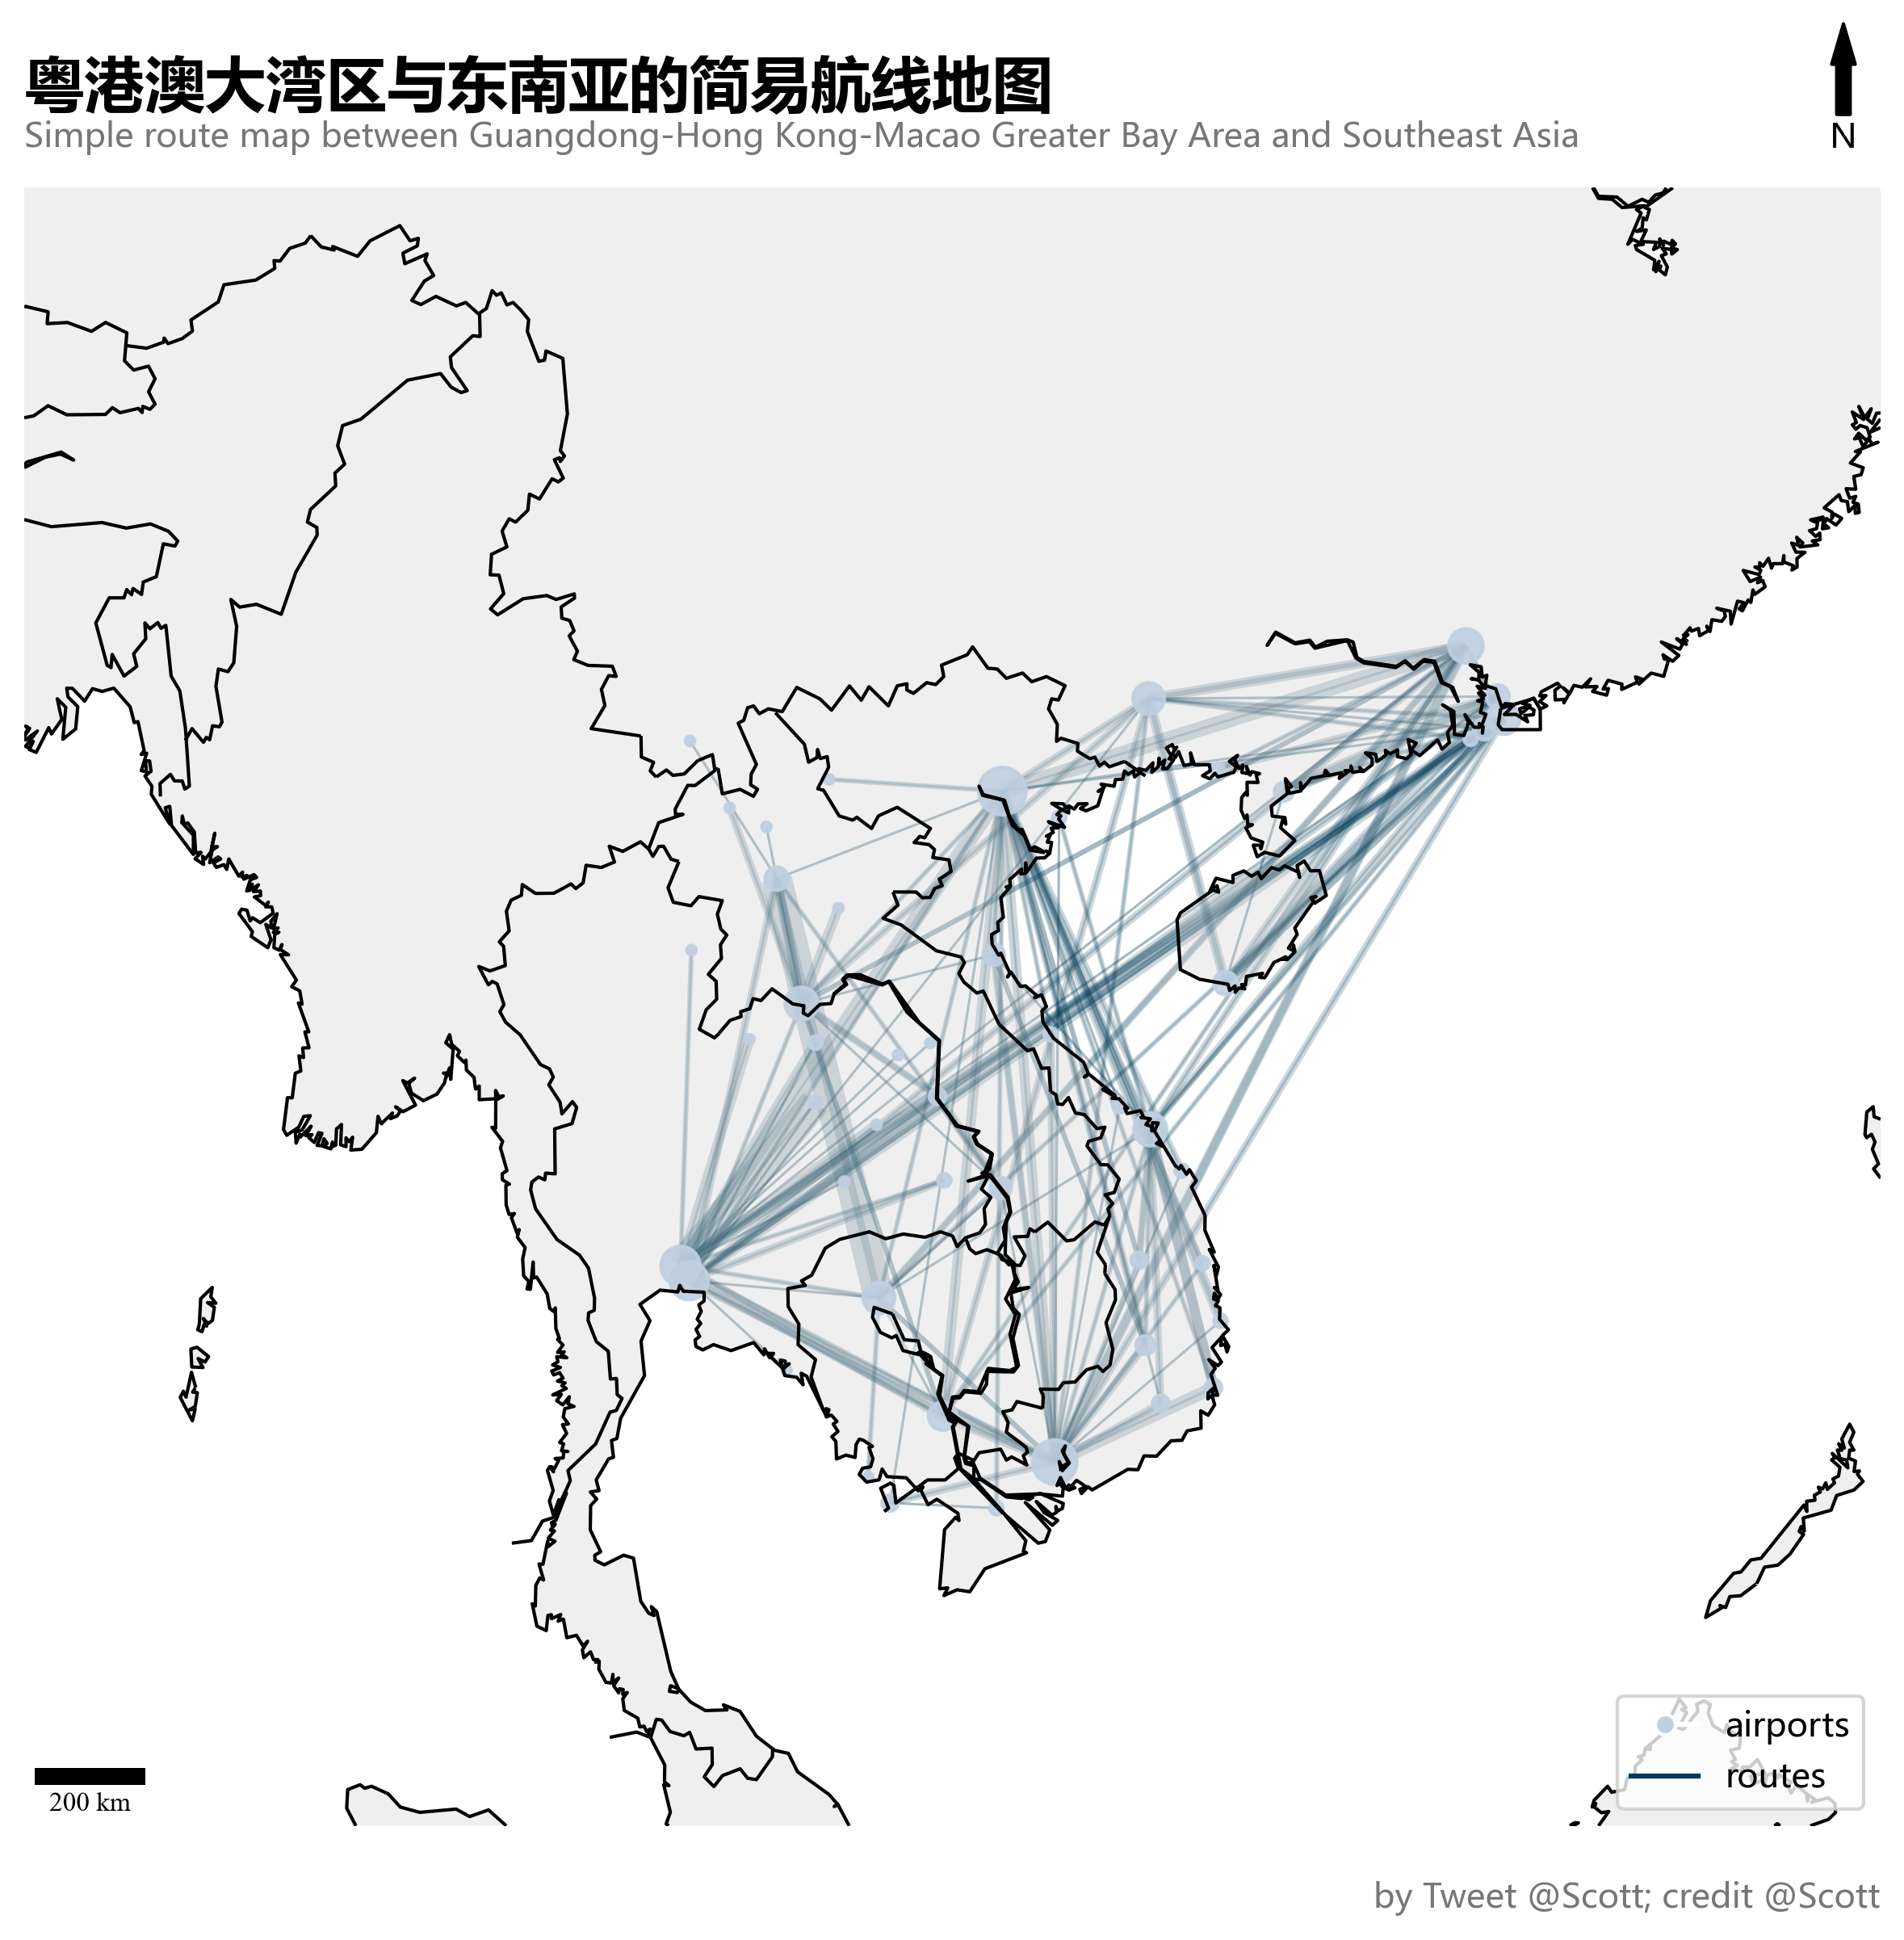

In [12]:
# Set up base map
fig = plt.figure(figsize=(9,8),dpi=300)
ax = fig.add_subplot(1,1,1)
m = Basemap(
        projection='merc',
        llcrnrlon=90,
        llcrnrlat=5,
        urcrnrlon=120,
        urcrnrlat=30,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])

nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 100],
		                       node_color = 'r', alpha = 0.8,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 100])

nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
                        labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 100})

nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 100],
                        node_color = '#c0d0e1', alpha = 0.9,
                        node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 100])

nx.draw_networkx_edges(G = graph, pos = pos, edge_color = '#013a55', width = routes_yga['counts']*0.75, 
                        alpha=0.2, arrows = False)

m.drawcountries(linewidth = 1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
m.fillcontinents(alpha = 0.3)
line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="#c0d0e1")
line3 = mlines.Line2D(range(1), range(1), color="#013a55", marker='',markerfacecolor="#013a55")
plt.legend((line2, line3), ( 'airports', 'routes'),
            loc=4, fontsize = 'medium')

ax.text(0, 1.05, '粤港澳大湾区与东南亚的简易航线地图',
            transform=ax.transAxes, size=18, weight=600, ha='left')
ax.text(0, 1.025, 'Simple route map between Guangdong-Hong Kong-Macao Greater Bay Area and Southeast Asia', transform=ax.transAxes, size=10, color='#777777')

scalebar = ScaleBar(dx=1*10**-3,units='km',length_fraction=0.1,
                    font_properties={'family': 'Times New Roman', 'weight': 'normal', 'size': 8},
                    location=3,sep=2,frameon=False)
ax.add_artist(scalebar)

x, y, arrow_length = 0.98, 1.1, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='k', width=4, headwidth=7),
            ha='center', va='center', fontsize=10,
            xycoords=ax.transAxes)

ax.text(1, -0.05, 'by Tweet @Scott; credit @Scott', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

ax.axis('off')
#m.bluemarble()
plt.tight_layout()
plt.savefig("map_3.jpeg", dpi = 300)
plt.show()